# Introduction to coordinates
Albert Y. Shih (`sunpy.coordinates` lead maintainer)

The `sunpy.coordinates` sub-package contains:

* A robust framework for working with solar-physics coordinate systems
* Functions to obtain the locations of solar-system bodies (`sunpy.coordinates.ephemeris`)
* Functions to calculate Sun-specific coordinate information (`sunpy.coordinates.sun`)

The [SunPy coordinate framework](https://docs.sunpy.org/en/stable/code_ref/coordinates/) extends the [Astropy coordinates framework](https://docs.astropy.org/en/stable/coordinates/).

The following diagram shows coordinate systems commonly used in solar physics and how they are connected to each other through transformations:

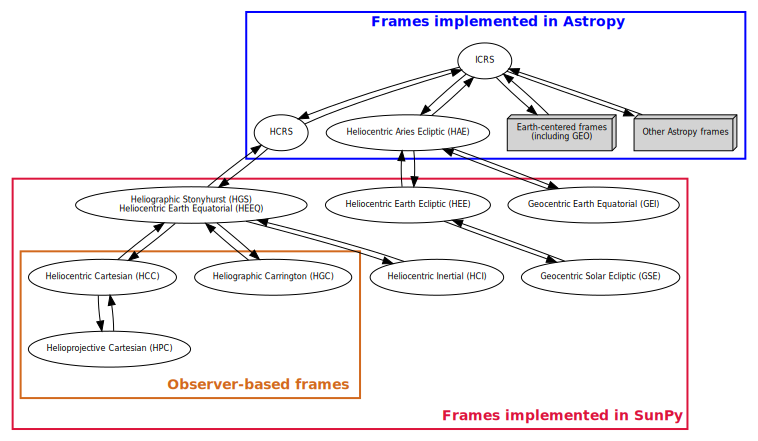

In [1]:
# This code block requires Graphviz and its Python bindings to be installed
from graphviz import Source
Source("""
    digraph {
        fontname="sans-serif"
        node [fontsize=8 fontname="sans-serif"]

        ICRS [label=ICRS]
        HCRS [label=HCRS]
        HeliocentricMeanEcliptic [label="Heliocentric Aries Ecliptic (HAE)"]
        HeliographicStonyhurst [label="Heliographic Stonyhurst (HGS)\nHeliocentric Earth Equatorial (HEEQ)"]
        HeliocentricEarthEcliptic [label="Heliocentric Earth Ecliptic (HEE)"]
        GeocentricEarthEquatorial [label="Geocentric Earth Equatorial (GEI)"]
        HeliographicCarrington [label="Heliographic Carrington (HGC)"]
        Heliocentric [label="Heliocentric Cartesian (HCC)"]
        HeliocentricInertial [label="Heliocentric Inertial (HCI)"]
        Helioprojective [label="Helioprojective Cartesian (HPC)"]
        GeocentricSolarEcliptic [label="Geocentric Solar Ecliptic (GSE)"]
        geocentric [label="Earth-centered frames\n(including GEO)" shape=box3d style=filled]
        astropy [label="Other Astropy frames" shape=box3d style=filled]

        ICRS -> HCRS
        ICRS -> HeliocentricMeanEcliptic
        HCRS -> ICRS
        HCRS -> HeliographicStonyhurst
        HeliocentricMeanEcliptic -> ICRS
        HeliocentricMeanEcliptic -> HeliocentricEarthEcliptic
        HeliocentricMeanEcliptic -> GeocentricEarthEquatorial
        HeliographicStonyhurst -> HeliographicCarrington
        HeliographicStonyhurst -> Heliocentric
        HeliographicStonyhurst -> HCRS
        HeliographicStonyhurst -> HeliocentricInertial
        HeliographicCarrington -> HeliographicStonyhurst
        Heliocentric -> Helioprojective
        Heliocentric -> HeliographicStonyhurst
        Helioprojective -> Heliocentric
        HeliocentricEarthEcliptic -> HeliocentricMeanEcliptic
        HeliocentricEarthEcliptic -> GeocentricSolarEcliptic
        GeocentricSolarEcliptic -> HeliocentricEarthEcliptic
        HeliocentricInertial -> HeliographicStonyhurst
        GeocentricEarthEquatorial -> HeliocentricMeanEcliptic
        
        subgraph cluster_astropy {
            color=blue
            fontcolor=blue
            penwidth=2
            label=<<b>Frames implemented in Astropy</b>>

            ICRS
            HCRS
            HeliocentricMeanEcliptic
            geocentric
            astropy

            ICRS -> geocentric
            ICRS -> astropy
            geocentric -> ICRS
            astropy -> ICRS
        }

        subgraph cluster_sunpy {
            color=crimson
            fontcolor=crimson
            penwidth=2
            label=<<b>Frames implemented in SunPy</b>>
            labeljust=r
            labelloc=b

            HeliographicStonyhurst
            HeliocentricInertial
            HeliocentricEarthEcliptic
            GeocentricSolarEcliptic
            GeocentricEarthEquatorial

            subgraph cluster_sunpy11 {
                color=chocolate
                fontcolor=chocolate
                label=<<b>Observer-based frames</b>>
                labeljust=r
                labelloc=b

                HeliographicCarrington
                Helioprojective
                Heliocentric
            }
        }
    }""")

This transformation graph reveals some of the underlying complexity to the coordinates framework, but for normal situations, a user does not need to be aware what transformations are necessary.  Everything is taken care of "under the hood"!  This includes transformations between systems defined in SunPy (red box) and systems defined in Astropy (blue box).

## A coordinate frame

A **coordinate frame** is a specific instance, or "realization", of a coordinate system.  For example, Stonyhurst heliographic coordinates are defined with the following Cartesian axes:

* The origin is the center of the Sun
* The Z-axis (+90 degrees latitude) is aligned with the Sun’s north pole.
* The X-axis (0 degrees longitude and 0 degrees latitude) is perpendicular to the Z-axis such that the XZ-plane contains the Sun-Earth line.  That is, Earth is at 0 degrees longitude (but usually not at 0 degrees latitude).
* The Y-axis (+90 degrees longitude and 0 degrees latitude) is perpendicular to both the X-axis and the Z-axis in a right-handed fashion.

Then, the coordinate frame is the realization of this definition at a particular time, which defines the position/orientation of the Sun and the position of the Earth.

Let's create a frame for Stonyhurst heliographic coordinates using SunPy's [`HeliographicStonyhurst` class](https://docs.sunpy.org/en/stable/api/sunpy.coordinates.frames.HeliographicStonyhurst.html):

In [2]:
from sunpy.coordinates import frames

time = '2021-06-04 14:45'
hgs_frame = frames.HeliographicStonyhurst(obstime=time)
hgs_frame

<HeliographicStonyhurst Frame (obstime=2021-06-04T14:45:00.000, rsun=695700.0 km)>

## A coordinate and different representations

A **coordinate** combines position data with a coordinate frame using Astropy's [SkyCoord class](https://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html).  This position data can have different **representations**, e.g., spherical components or Cartesian components.  Unless a different representation type is specified, the first three (or two) positional arguments to `SkyCoord` are interpreted using the default representation, which for `HeliographicStonyhurst` is spherical components.

In [3]:
import astropy.units as u
from astropy.coordinates import SkyCoord

hgs_coord = SkyCoord(10*u.deg, 20*u.deg, 1*u.AU, frame=hgs_frame)  # longitude, latitude, and distance from the origin
hgs_coord

<SkyCoord (HeliographicStonyhurst: obstime=2021-06-04T14:45:00.000, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, AU)
    (10., 20., 1.)>

You can access the coordinate components through attributes:

In [4]:
print(f"""Longitude: {hgs_coord.lon}
Latitude: {hgs_coord.lat}
Distance from Sun center: {hgs_coord.radius}""")

Longitude: 10.0 deg
Latitude: 20.0 deg
Distance from Sun center: 1.0 AU


Stonyhurst heliographic coordinates with Cartesian components is also known as Heliocentric Earth Equatorial (HEEQ).  Here's one way to transform the above coordinate to use the Cartesian representation:

In [5]:
hgs_coord_xyz = SkyCoord(hgs_coord, representation_type='cartesian')
hgs_coord_xyz

<SkyCoord (HeliographicStonyhurst: obstime=2021-06-04T14:45:00.000, rsun=695700.0 km): (x, y, z) in AU
    (0.92541658, 0.16317591, 0.34202014)>

In [6]:
print(f"""X: {hgs_coord_xyz.x}
Y: {hgs_coord_xyz.y}
Z: {hgs_coord_xyz.z}""")

X: 0.9254165783983234 AU
Y: 0.16317591116653482 AU
Z: 0.3420201433256687 AU


Here's another example of creating a coordinate where:
* A non-default representation type is explicitly specified, which changes how positional arguments are interpreted as components.
* The coordinate frame is specified using a string rather than a frame instance.  Additional frame attributes (e.g., the frame time) can be specified as arguments to `SkyCoord`.

In [7]:
SkyCoord(0.9*u.AU, 0.2*u.AU, 0.3*u.AU, representation_type='cartesian',
         frame='heliographic_stonyhurst', obstime=time)

<SkyCoord (HeliographicStonyhurst: obstime=2021-06-04T14:45:00.000, rsun=695700.0 km): (x, y, z) in AU
    (0.9, 0.2, 0.3)>

## Observer-based frames

A number of coordinate frames are **observer-based**, which means that the position of the observer is fundamental to the definition of the coordinate frame.  For example, helioprojective Cartesian coordinates are aligned such that one axis is aligned with the Sun-observer line.  Let's use the above `HeliographicStonyhurst` coordinate as the observer for a [`Helioprojective` frame](https://docs.sunpy.org/en/stable/api/sunpy.coordinates.frames.Helioprojective.html), here for 2D helioprojective coordinates (theta_x, theta_y) = (123 arcsec, 456 arcsec).

In [8]:
hpc_frame = frames.Helioprojective(obstime=time, observer=hgs_coord)
SkyCoord(123*u.arcsec, 456*u.arcsec, frame=hpc_frame)

<SkyCoord (Helioprojective: obstime=2021-06-04T14:45:00.000, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2021-06-04T14:45:00.000, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, AU)
    (10., 20., 1.)>): (Tx, Ty) in arcsec
    (123., 456.)>

## Transforming a coordinate

A coordinate can be transformed to any other frame on the transformation graph.  For example, let's create a coordinate in the [Heliocentric Earth Ecliptic frame](https://docs.sunpy.org/en/stable/api/sunpy.coordinates.frames.HeliocentricEarthEcliptic.html).

In [9]:
hee_coord = SkyCoord(0.1*u.AU, 0.2*u.AU, 0.3*u.AU, representation_type='cartesian',
                     frame='heliocentricearthecliptic', obstime=time)
hee_coord

<SkyCoord (HeliocentricEarthEcliptic: obstime=2021-06-04T14:45:00.000): (x, y, z) in AU
    (0.1, 0.2, 0.3)>

We can transform this coordinate to the [Geocentric Solar Ecliptic frame](https://docs.sunpy.org/en/stable/api/sunpy.coordinates.frames.GeocentricSolarEcliptic.html).

In [10]:
gse_coord = hee_coord.transform_to('geocentricsolarecliptic')  # This coordinate defaults to spherical components
SkyCoord(gse_coord, representation_type='cartesian')

<SkyCoord (GeocentricSolarEcliptic: obstime=2021-06-04T14:45:00.000): (x, y, z) in AU
    (0.91455823, -0.2, 0.3)>

We can also transform to (or from) an observer-based frame, such as the `Helioprojective` frame we created above.

In [11]:
hee_coord.transform_to(hpc_frame)

<SkyCoord (Helioprojective: obstime=2021-06-04T14:45:00.000, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2021-06-04T14:45:00.000, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, AU)
    (10., 20., 1.)>): (Tx, Ty, distance) in (arcsec, arcsec, AU)
    (37242.71285625, 66008.83003305, 0.82434917)>

## Ephemeris functions

`sunpy.coordinates` provides functions to obtain the coordinates of solar-system bodies.  For bodies that are in the current Astropy ephemeris (e.g., planets), you can use [`get_body_heliographic_stonyhurst()`](https://docs.sunpy.org/en/stable/api/sunpy.coordinates.get_body_heliographic_stonyhurst.html):

In [12]:
from sunpy.coordinates import get_body_heliographic_stonyhurst

SkyCoord(get_body_heliographic_stonyhurst('Mars', time))

<SkyCoord (HeliographicStonyhurst: obstime=2021-06-04T14:45:00.000, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, AU)
    (-114.62835286, -4.64740583, 1.65865469)>

For all other solar-system bodies (e.g., major man-made spacecraft or comets), you can use [`get_horizons_coord()`](https://docs.sunpy.org/en/stable/api/sunpy.coordinates.get_horizons_coord.html), which queries [JPL HORIZONS](https://ssd.jpl.nasa.gov/?horizons):

In [13]:
from sunpy.coordinates import get_horizons_coord

get_horizons_coord('Solar Orbiter', time)

INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144 [sunpy.coordinates.ephemeris]


<SkyCoord (HeliographicStonyhurst: obstime=2021-06-04T14:45:00.000, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, AU)
    (-99.06769586, -1.11895552, 0.95197894)>

## Sun-specific coordinate information

`sunpy.coordinates.sun` provides functions for Sun-specific coordinate information (assuming an Earth-based observer).

In [14]:
from sunpy.coordinates import sun

print(f"""B0 angle: {sun.B0(time)}
L0 angle: {sun.L0(time)}""")

B0 angle: -0.23164402438805823 deg
L0 angle: 40.5976746184717 deg


In [15]:
sun.print_params(time)

Solar Ephemeris for 2021-06-04T14:45:00.000 UTC

Distance = 1.0145582266325062 AU
Semidiameter = 945.4667680869455 arcsec
True (long, lat) = (74d12m27.40814215s, -0d00m00.19198487s)
Apparent (long, lat) = (74d11m50.53390269s, -0d00m00.19198487s)
True (RA, Dec) = (4h51m28.23093725s, 22d30m07.88333617s)
Apparent (RA, Dec) = (4h51m25.56613551s, 22d30m06.17743393s)
Heliographic long. and lat of disk center = (40d35m51.6286265s, -0d13m53.9184878s)
Position angle of north pole = -13.981491087597774 deg
Carrington rotation number = 2244.8872286816154


In [16]:
# The functions in sunpy.coordinates.sun
sun.__all__

['angular_radius',
 'sky_position',
 'carrington_rotation_number',
 'carrington_rotation_time',
 'true_longitude',
 'apparent_longitude',
 'true_latitude',
 'apparent_latitude',
 'mean_obliquity_of_ecliptic',
 'true_rightascension',
 'true_declination',
 'true_obliquity_of_ecliptic',
 'apparent_rightascension',
 'apparent_declination',
 'print_params',
 'B0',
 'L0',
 'P',
 'earth_distance',
 'orientation']